# The Connection between Northeastern United States Warming and Northwest Atlantic Shelf Warming.

**<font size=3>The coastal northeastern United States (NEUS) has been the fastest warming region in North America, and the adjacent Northwest Atlantic shelf (NWS) region has also warmed twice as fast as the global ocean over recent decades. Here, we will explore the connection between the increase in sea surface temperature (SST) of NWS and the increase in surface air temperature (SAT) of NEUS from 1902 to 2020. This correlation is important, because Northwest Atlantic warming has been projected to continue, and if it is the main driver of the exceptional warming of the northeast coast, this vulnerable region with high population density would suffer.**

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy
import pooch
import pip
pip.main(['install','seaborn'])
import seaborn as sns

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


# 1. SAT warming trends in the NEUS from 1902 to 2020

## 1.1 Annual SAT trend

In [2]:
# Load global SAT data
# Original doi of the article is "https://doi.org/10.1038/s41558-021-01159-7".
POOCH = pooch.create(
    path=pooch.os_cache(""),
    base_url="https://zenodo.org/record/5787076/files/",
    registry={
        "tmp.dat.nc": "md5:2bf42b8775489bad84bf918eac092162",
    }
)

fname = POOCH.fetch("tmp.dat.nc")
global_sat = xr.open_dataset(fname)
global_sat

<xarray.Dataset>
Dimensions:  (lon: 720, lat: 360, time: 1440)
Coordinates:
  * lon      (lon) float32 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float32 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * time     (time) datetime64[ns] 1901-01-16 1901-02-15 ... 2020-12-16
Data variables:
    tmp      (time, lat, lon) float32 ...
    stn      (time, lat, lon) float64 ...
Attributes:
    Conventions:  CF-1.4
    title:        CRU TS4.05 Mean Temperature
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    source:       Run ID = 2103051243. Data generated from:tmp.2103041709.dtb
    history:      Fri  5 Mar 13:25:53 GMT 2021 : User harry : Program makegri...
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    contact:      support@ceda.ac.uk

Text(0.5, 1.0, 'Annual Surface Air Temperature Trend')

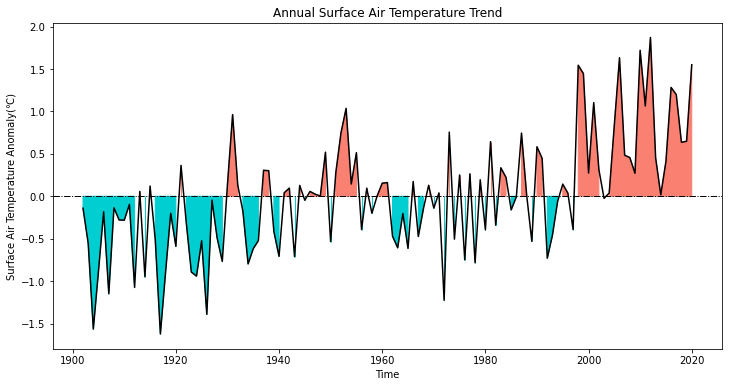

In [3]:
# Select the eastern US region and calculate annual SAT anomaly mean
sat = global_sat.sel(lon=slice(-85, -55), lat=slice(25, 55), time=slice('1902-01-16T00:00:00.000000000', '2020-12-16T00:00:00.000000000'))
sat_gb = sat.groupby('time.month')
sat_anom = sat_gb - sat_gb.mean(dim = 'time')
sat_mean = sat_anom.groupby('time.year').mean(dim = ('time', 'lat', 'lon'))

fig = plt.figure(figsize = (12,6))
sat_mean.tmp.plot(c = 'k', linewidth = 1.5, )
plt.axhline(y = 0, c = 'k', linewidth = 1, linestyle = 'dashdot')
plt.fill_between(sat_mean.year, sat_mean.tmp.where(sat_mean.tmp>0), 0, color='salmon')
plt.fill_between(sat_mean.year, sat_mean.tmp.where(sat_mean.tmp<0), 0, color='darkturquoise')
plt.xlabel('Time')
plt.ylabel('Surface Air Temperature Anomaly(℃)')
plt.title('Annual Surface Air Temperature Trend')

Text(0.5, 1.0, 'SAT Trend, ANN')

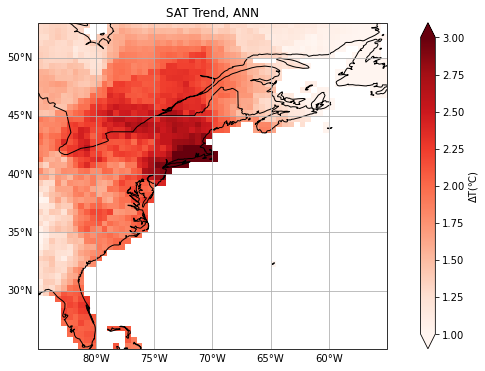

In [4]:
# Plot the increase in SAT anomaly from 1902 to 2020
sat_2020_anom = sat_anom.groupby('time.year')[2020]
sat_1902_anom = sat_anom.groupby('time.year')[1902]
sat_ANN_change = sat_2020_anom.mean(dim = 'time') - sat_1902_anom.mean(dim = 'time')

extent = [-85, -55, 25, 53]
proj = ccrs.PlateCarree()
fig = plt.figure(figsize = (12,6))
ax = plt.axes(projection = proj)
ax.set_extent(extent, crs = ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels = ['left', 'bottom'])
ax.add_feature(cfeature.BORDERS)
sat_ANN_plot = sat_ANN_change.tmp.plot(transform = proj, cmap = 'Reds',
                                cbar_kwargs = {'extend': 'both', 'label': 'ΔT(℃)'}, vmin = 1, vmax = 3)
ax.set_title('SAT Trend, ANN')

**<font size=3>Conclusions: The plot shows the spatial pattern of SAT increase from 1902 to 2020, we can see an enhanced temperature increase along the coast, especially on the northeast coast, the increase is remarkable. And the central area has a lower temperature increase during this period.**

## 1.2 Seasonal SAT trends

In [5]:
sat_2020_monthly_anom = sat_2020_anom.groupby('month').mean(dim = 'time') 
sat_1902_monthly_anom = sat_1902_anom.groupby('month').mean(dim = 'time')
sat_monthly_change = sat_2020_monthly_anom - sat_1902_monthly_anom

DJF = sat_monthly_change.sel(month = [12,1,2]).mean(dim = 'month') #winter
MAM = sat_monthly_change.sel(month = [3,4,5]).mean(dim = 'month') #spring
JJA = sat_monthly_change.sel(month = [6,7,8]).mean(dim = 'month') #summer
SON = sat_monthly_change.sel(month = [9,10,11]).mean(dim = 'month') #autumn

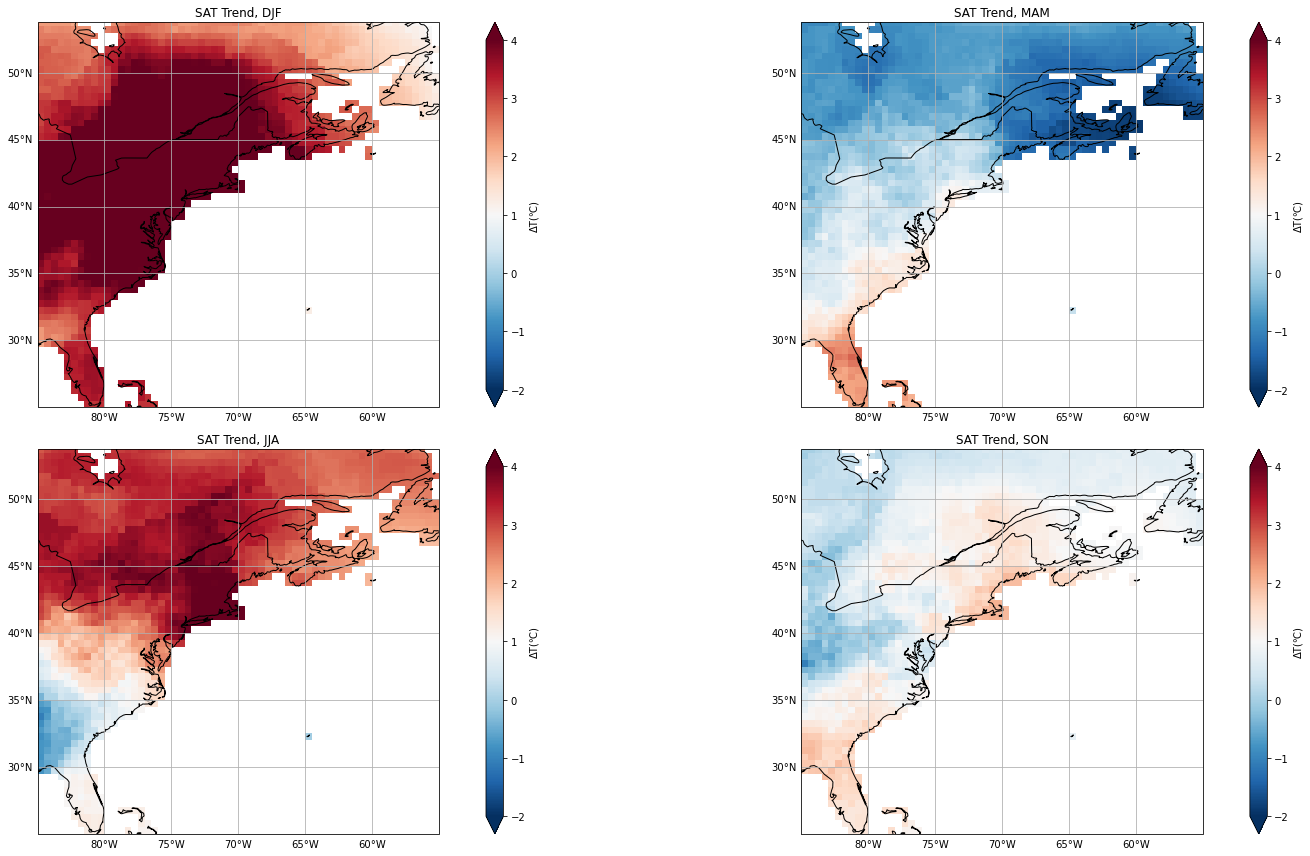

In [6]:
fig, ax = plt.subplots(figsize = (24,12), ncols = 2, nrows = 2, subplot_kw={"projection": proj, "extent": extent})
# DJF plot
ax[0,0].coastlines()
ax[0,0].gridlines(draw_labels = ['left', 'bottom'])
ax[0,0].add_feature(cfeature.BORDERS)
DJF_plot = DJF.tmp.plot(ax = ax[0,0], transform = proj, cmap = 'RdBu_r',
                        cbar_kwargs = {'extend': 'both', 'label': 'ΔT(℃)'}, vmin = -2, vmax = 4)
ax[0,0].set_title('SAT Trend, DJF')
# MAM plot
ax[0,1].coastlines()
ax[0,1].gridlines(draw_labels = ['left', 'bottom'])
ax[0,1].add_feature(cfeature.BORDERS)
MAM_plot = MAM.tmp.plot(ax = ax[0,1], transform = proj, cmap = 'RdBu_r',
                        cbar_kwargs = {'extend': 'both', 'label': 'ΔT(℃)'}, vmin = -2, vmax = 4)
ax[0,1].set_title('SAT Trend, MAM')
# JJA plot
ax[1,0].coastlines()
ax[1,0].gridlines(draw_labels = ['left', 'bottom'])
ax[1,0].add_feature(cfeature.BORDERS)
JJA_plot = JJA.tmp.plot(ax = ax[1,0], transform = proj, cmap = 'RdBu_r',
                        cbar_kwargs = {'extend': 'both', 'label': 'ΔT(℃)'}, vmin = -2, vmax = 4)
ax[1,0].set_title('SAT Trend, JJA')
# SON plot
ax[1,1].coastlines()
ax[1,1].gridlines(draw_labels = ['left', 'bottom'])
ax[1,1].add_feature(cfeature.BORDERS)
SON_plot = SON.tmp.plot(ax = ax[1,1], transform = proj, cmap = 'RdBu_r',
                        cbar_kwargs = {'extend': 'both', 'label': 'ΔT(℃)'}, vmin = -2, vmax = 4)
ax[1,1].set_title('SAT Trend, SON')
plt.tight_layout()

**<font size=3>Conclusions: (1)The coastal NEUS has experienced significant warming over the last 118 years. (2)Warming trends of the coastal NEUS in winter and in summer are most remarkable, contributing to high annual mean warming. (3)Enhanced coastal warming occurs almost in all seasons and especially in summer and winter.**

# 2. SST warming trends in the NWS from 1902 to 2020

## 2.1 Annual SST trend

In [7]:
# Load global SST data
sstfile = pooch.retrieve(
    'https://www.metoffice.gov.uk/hadobs/hadisst/data/HadISST_sst.nc.gz',
    known_hash=None,
    processor=pooch.Decompress(),
)

ds = xr.open_dataset(sstfile, drop_variables=['time_bnds'])
ds = ds.rename({'latitude': 'lat', 'longitude': 'lon'})
sst = ds.sel(lon=slice(-85, -55), lat=slice(55, 25), time=slice('1902-01-16T12:00:00.000000000', '2020-12-16T12:00:00.000000000'))
sst

<xarray.Dataset>
Dimensions:  (time: 1428, lat: 30, lon: 30)
Coordinates:
  * time     (time) datetime64[ns] 1902-01-16T12:00:00 ... 2020-12-16T12:00:00
  * lat      (lat) float32 54.5 53.5 52.5 51.5 50.5 ... 29.5 28.5 27.5 26.5 25.5
  * lon      (lon) float32 -84.5 -83.5 -82.5 -81.5 ... -58.5 -57.5 -56.5 -55.5
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Title:                      Monthly version of HadISST sea surface temper...
    description:                HadISST 1.1 monthly average sea surface tempe...
    institution:                Met Office Hadley Centre
    source:                     HadISST
    reference:                  Rayner, N. A., Parker, D. E., Horton, E. B., ...
    Conventions:                CF-1.0
    history:                    29/11/2021 converted to netcdf from pp format
    supplementary_information:  Updates and supplementary information will be...
    comment:                    Data restrictions: for academic research use ...

Text(0.5, 1.0, 'Annual Sea Surface Temperature Trend')

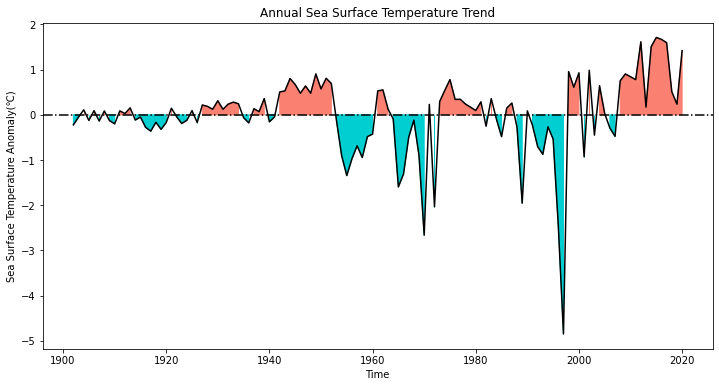

In [8]:
sst_gb = sst.groupby('time.month')
sst_anom = sst_gb - sst_gb.mean(dim = 'time')
sst_mean = sst_anom.groupby('time.year').mean(dim = ('time', 'lat', 'lon'))

fig = plt.figure(figsize = (12,6))
sst_mean.sst.plot(c = 'k', linewidth = 1.5)
plt.axhline(y = 0, c = 'k', linewidth = 1.5, linestyle = 'dashdot')
plt.fill_between(sst_mean.year, sst_mean.sst.where(sst_mean.sst>0), 0, color='salmon')
plt.fill_between(sst_mean.year, sst_mean.sst.where(sst_mean.sst<0), 0, color='darkturquoise')
plt.xlabel('Time')
plt.ylabel('Sea Surface Temperature Anomaly(℃)')
plt.title('Annual Sea Surface Temperature Trend')

## 2.2 Spacial pattern of SST trend

Text(0.5, 1.0, 'SST Trend, ANN')

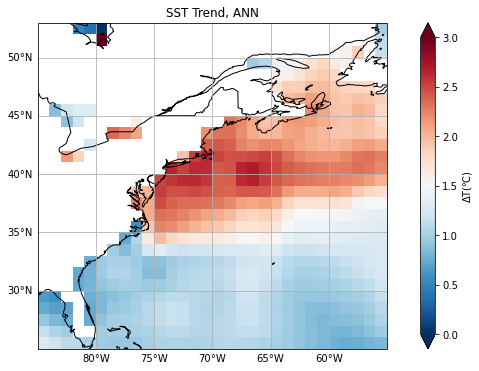

In [9]:
sst_2020_anom = sst_anom.groupby('time.year')[2020]
sst_1902_anom = sst_anom.groupby('time.year')[1902]
sst_ANN_change = sst_2020_anom.mean(dim = 'time') - sst_1902_anom.mean(dim = 'time')

extent = [-85, -55, 25, 53]
proj = ccrs.PlateCarree()

fig = plt.figure(figsize = (12,6))
ax = plt.axes(projection = proj)
ax.set_extent(extent, crs = ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels = ['left', 'bottom'])
ax.add_feature(cfeature.BORDERS)
sst_ANN_plot = sst_ANN_change.sst.plot(transform = proj, cmap = 'RdBu_r',cbar_kwargs = {'extend': 'both', 'label': 'ΔT(℃)'}, vmin = 0, vmax = 3)
ax.set_title('SST Trend, ANN')

**<font size=3>Conclusions: The highest annual mean SST warming is located in the NWS region off the coast of NEUS, which matches a coherent pattern of SAT warming over land. So the warming trends in NWS and NEUS may be correlated.**

# 3.General correlation between SAT trend and SST trend

/srv/conda/envs/notebook/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Correlation Between SAT Anomalies and SST Anomalies')

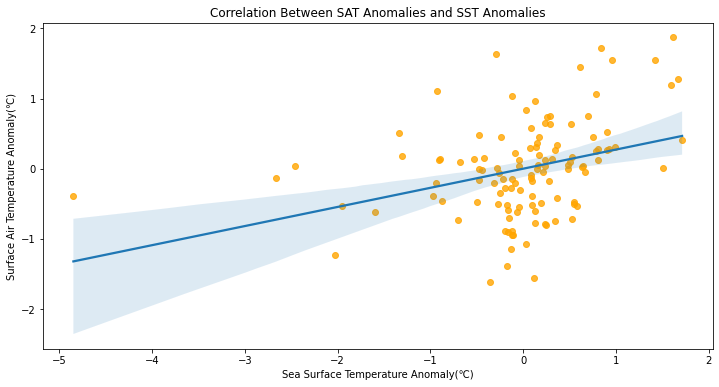

In [10]:
fig = plt.figure(figsize=(12,6))
sns.regplot(sst_mean.sst, sat_mean.tmp, ci=95, scatter_kws = {'color': 'orange'})
plt.xlabel('Sea Surface Temperature Anomaly(℃)')
plt.ylabel('Surface Air Temperature Anomaly(℃)')
plt.title('Correlation Between SAT Anomalies and SST Anomalies')

**<font size=3>Conclusion: The annual SAT trend and annual SST trend have positive correlation, with a 95% confidence interval.**